# Temporal Networks v1.0 #

In [1]:
import sys
sys.path.append("/home/genois/Bureau/tempnet/")
import numpy as np
import matplotlib.pyplot as plt

## Randomisations ##

The `randomisations` module provides tools for randomising temporal networks. The methods developped in this library and their effects on temporal networks features are described in the following reference paper:

Randomized reference models for temporal networks. Gauvin, Génois, Karsai, Kivelä, Takaguchi, Valdano and Vestergaard.

https://arxiv.org/abs/1806.04032

In [11]:
import tempnet.utils as tnu
import tempnet.measures as tnm
import tempnet.randomisations as tnr

## Basic shufflings ##
We here present basic randomization techniques.

### Global instant-events shuffling $\text{P}[1]$: `P__1(seq_data)` ###
This function randomly permutates instant-events of a `snapshot_sequence()` object `seq_data`, and returns a `snapshot_sequence()` object.

In [3]:
seq_data = tnu.read_snapshot_sequence("/home/genois/Bureau/tempnet/timeset_InVS13.dat")
new_seq = tnr.P__1(seq_data)

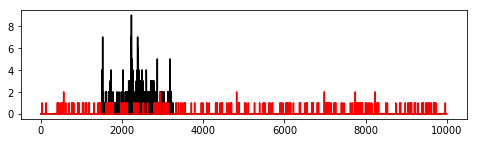

In [8]:
TL0 = tnm.activity_timeline(seq_data)
TL1 = tnm.activity_timeline(new_seq)

tmin = 0
tmax = 10000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Global event shuffling $\text{P}[p(\tau)]$: `P__ptau(lks_data,dt)` ###
This function shuffles contacts between all possible links of a `link_timeline()` object `lks_data` without preserving their starting time and duration. The initial time `ti`, the final time `tf` and the time step duration `dt` are required. It returns a `link_timeline()` object.

In [3]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__ptau(lks_data,0,60480,1)

Test of the modification of the activity timeline:

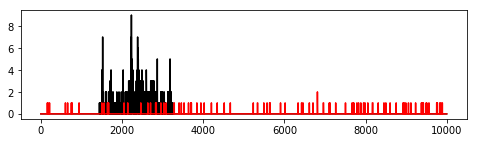

In [7]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 0
tmax = 10000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

Test of the preservation of the $p_\tau$:

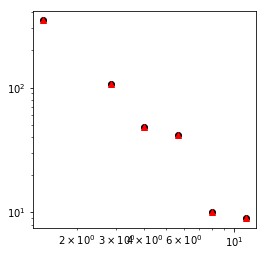

In [10]:
import itertools as it
from math import log

list_tau0 = tnm.contact_durations(lks_data)
list_tau1 = tnm.contact_durations(new_lks)
list_tau0 = list(it.chain(*list_tau0.values()))
list_tau1 = list(it.chain(*list_tau1.values()))

fig = plt.figure(figsize=(4,4))
tmax = max(list_tau0)
x = 2.**(np.arange(0,log(tmax)+1,0.5))
h0 = np.histogram(list_tau0,bins=x)
h1 = np.histogram(list_tau1,bins=x)
plt.loglog(x[1:],h0[0],'ko')
plt.loglog(x[1:],h1[0],'r^')
plt.show()